In [97]:
import numpy as np

import pickle

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
directory = './results/sitting/'
import os

In [120]:
results = []
for f in os.listdir(directory):
    df = pickle.load(open(directory+f,'rb'))
    results.append(df)
    
data = pd.concat(results)

In [121]:
data = data[(data.test_lengths<200)&(~data.train_lengths.isin([510,480,600,690,750]))]

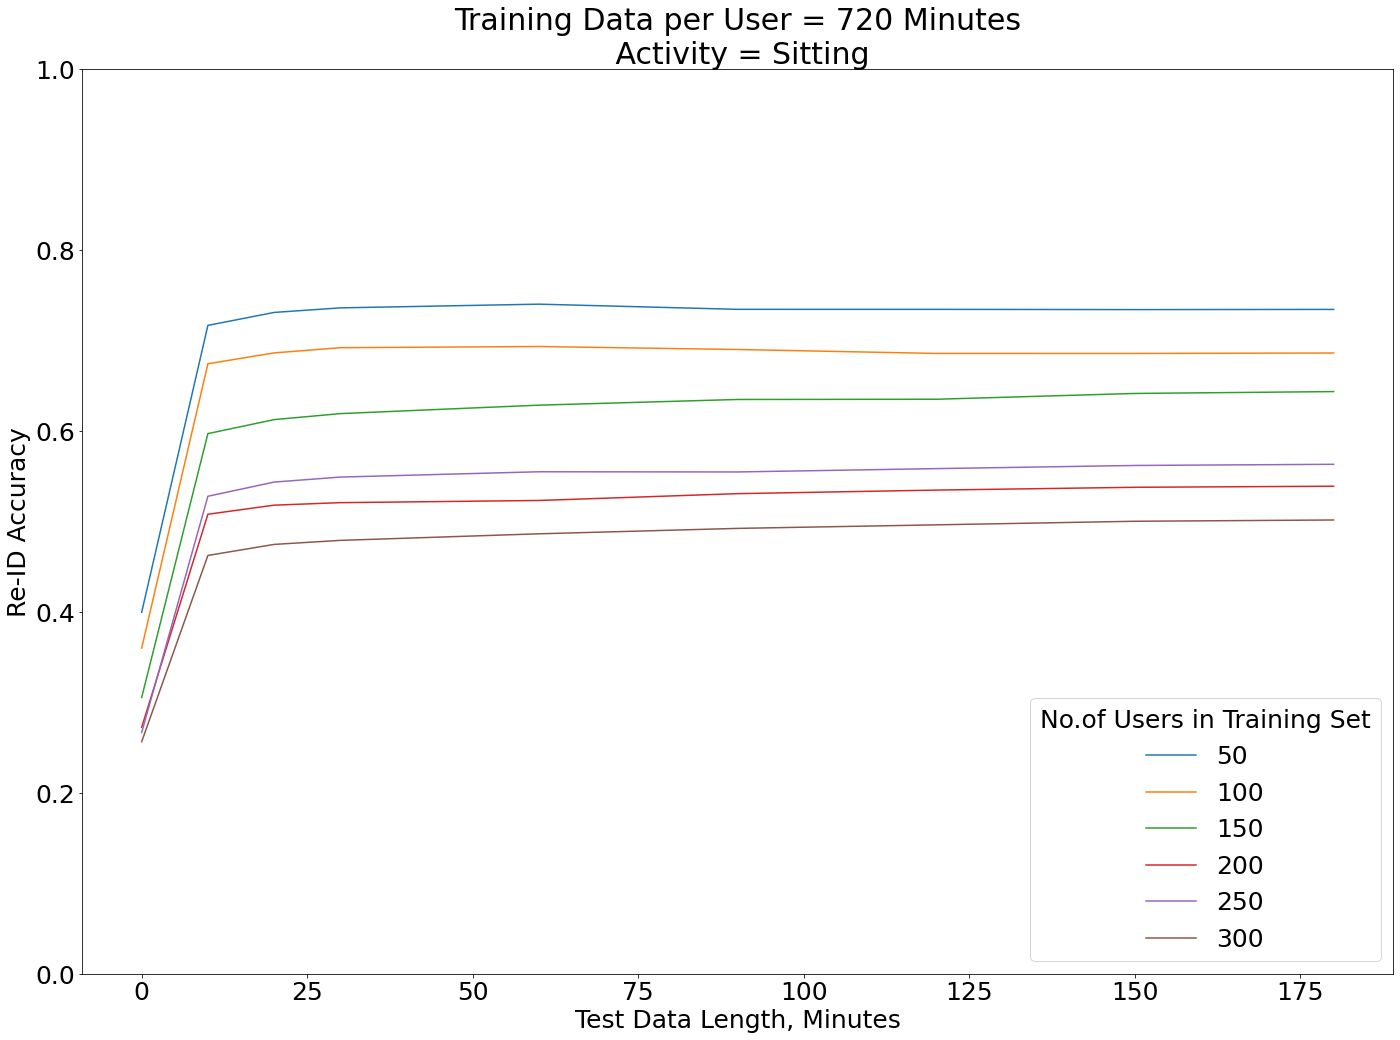

In [122]:
data['Training Data Per User, Minutes'] = data['train_lengths'].apply(lambda a:str(a))
data['No.of Users in Training Set'] = data['train_user'].apply(lambda a:str(a))
tr_length = 720
plt.rcParams.update({'font.size':25})
plt.figure(figsize=(20,15))
sns.lineplot(x='test_lengths',y='majority_score',hue='No.of Users in Training Set',data=data[data.train_lengths==tr_length])
plt.ylabel('Re-ID Accuracy')
plt.xlabel('Test Data Length, Minutes')
plt.title('Training Data per User = '+str(tr_length)+' Minutes\n Activity = Sitting')
plt.ylim([0,1])
plt.tight_layout()
plt.savefig('./data/images/sitting_'+str(tr_length)+'_training_data_per_user.png')
plt.show()

In [ ]:
for n_user in np.arange(50,350,50):
    data = pd.concat(results)
    data = data[(data.train_user==n_user)&(data.test_lengths<200)&(~data.train_lengths.isin([510,480,600,690,750]))]
    import pandas as pd
    df = pd.pivot_table(data,columns='train_lengths',index='test_lengths',values='majority_score',aggfunc='mean')

    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.rcParams.update({'font.size':20})
    plt.figure(figsize=(30,15))
    sns.heatmap(df,annot=True,fmt='.2f',cmap='Reds',linewidth=1,linecolor='black')
    plt.yticks(rotation=0)
    plt.ylabel('Test Data Lengths, Minutes',fontsize=30)
    plt.xlabel('Training Data Per User, Minutes',fontsize=30)
    plt.title('No. of User in Training Set = '+str(n_user)+'\n Activity = Sitting',fontsize=30)
    plt.ylim([0,1])
    plt.tight_layout()
    plt.savefig('./data/images/sitting_'+str(n_user)+'_participants_heatmap.png')
    plt.show()

In [ ]:
df_walking = pickle.load(open('./data/walking_multiple_iterations.p','rb'))

df_walking_mean  = df_walking.groupby(['test_lengths','train_user','train_lengths'],as_index=False).mean()

In [ ]:
plt.rcParams.update({'font.size':25})
df_walking_mean = df_walking_mean[(df_walking_mean.test_lengths<=30)&(df_walking_mean.train_lengths>=40)]
# df_walking_mean['Training data per user'] = df_walking_mean['train_lengths'].apply(lambda a:str(int(a*6))+'$\Delta$')
df_walking_mean['Training Data Per User, Minutes'] = df_walking_mean['train_lengths'].apply(lambda a:str(a))
# plt.legend(loc='lower right')
for n_user in df_walking_mean.train_user.unique():
    temp = df_walking_mean[df_walking_mean.train_user==n_user]
    plt.figure(figsize=(20,10))
    sns.lineplot(x='test_lengths',y='majority_score',hue='Training Data Per User, Minutes',data=temp)
#     plt.xticks(list(df_walking_mean.test_lengths.unique()),
#                [str(int(a*6))+'$\Delta$' for a in df_walking_mean.test_lengths.unique()],rotation=60)
    plt.ylabel('Re-ID Accuracy')
    plt.xlabel('Test Data Lengths, Minutes')
    plt.title('No.of Users in Training Set = '+str(n_user))
    plt.tight_layout()
    plt.savefig('./data/images/users_in_training_set_'+str(n_user)+'.png')
    plt.show()

In [117]:
df_walking = pickle.load(open('./data/walking_multiple_iterations.p','rb'))

df_walking_mean  = df_walking.groupby(['test_lengths','train_user','train_lengths'],as_index=False).mean()
df_walking_mean = df_walking_mean[(df_walking_mean.test_lengths<=30)&(df_walking_mean.train_lengths>=40)&(df_walking_mean.train_lengths<180)]

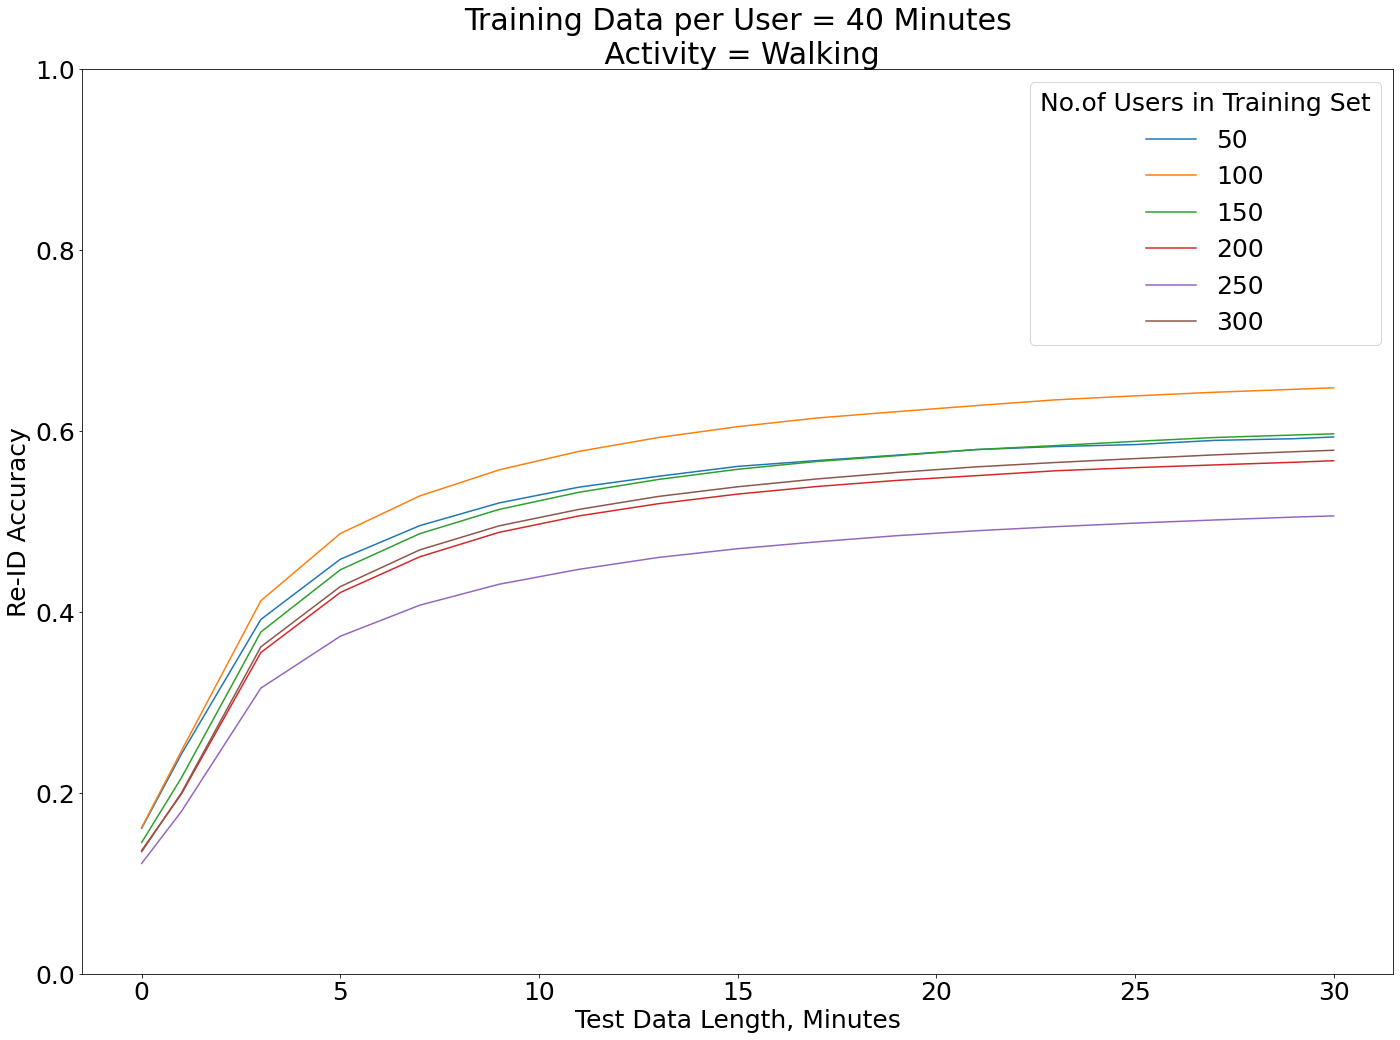

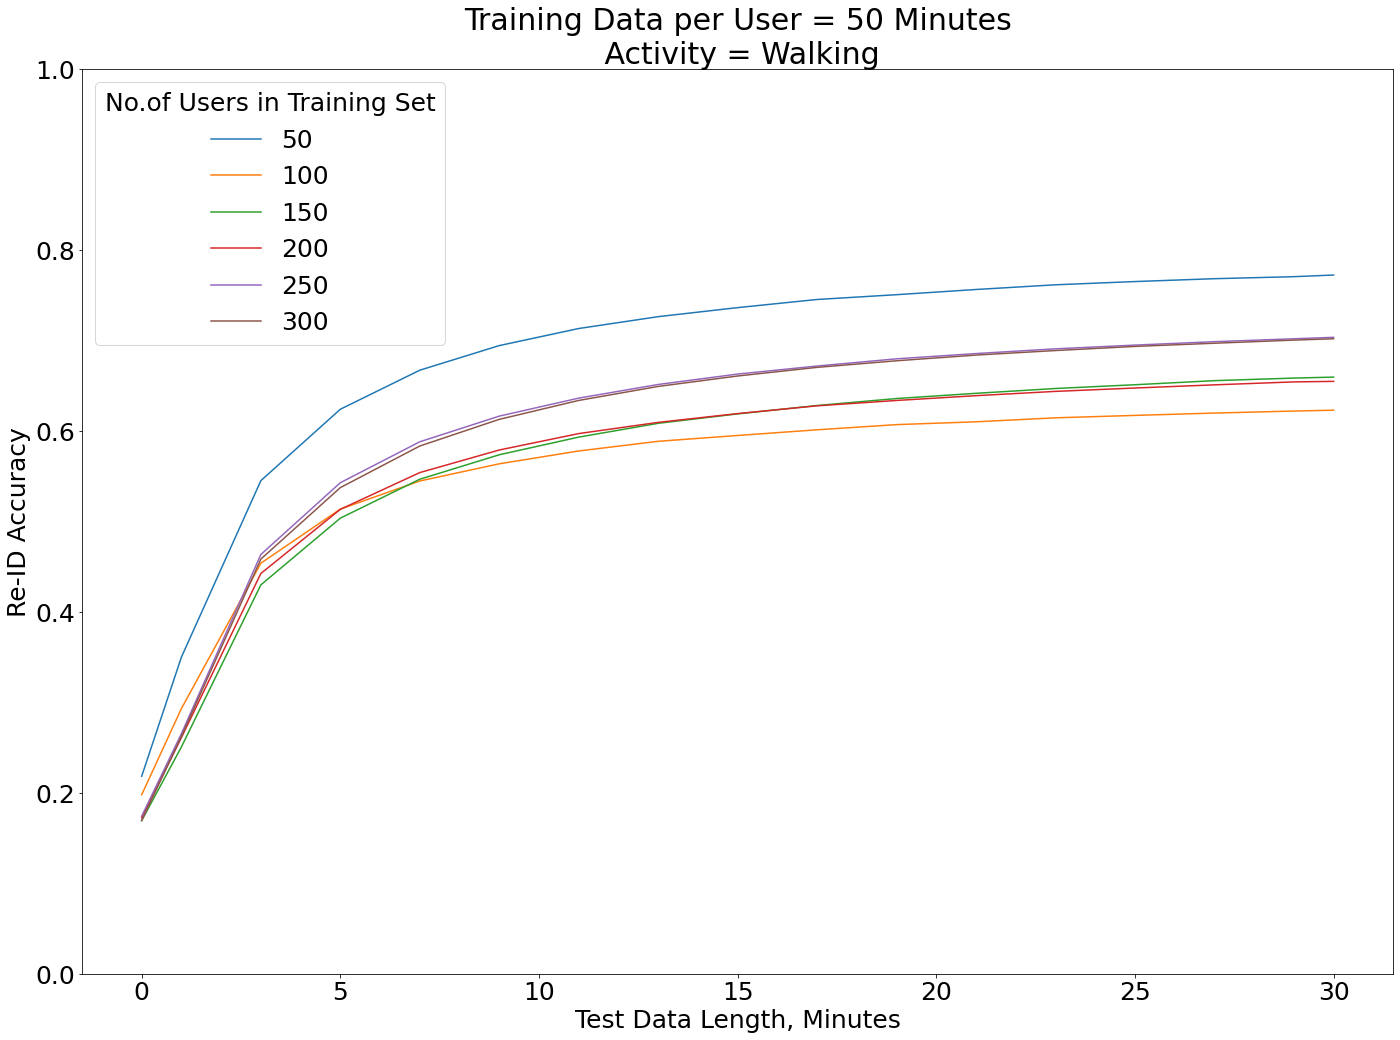

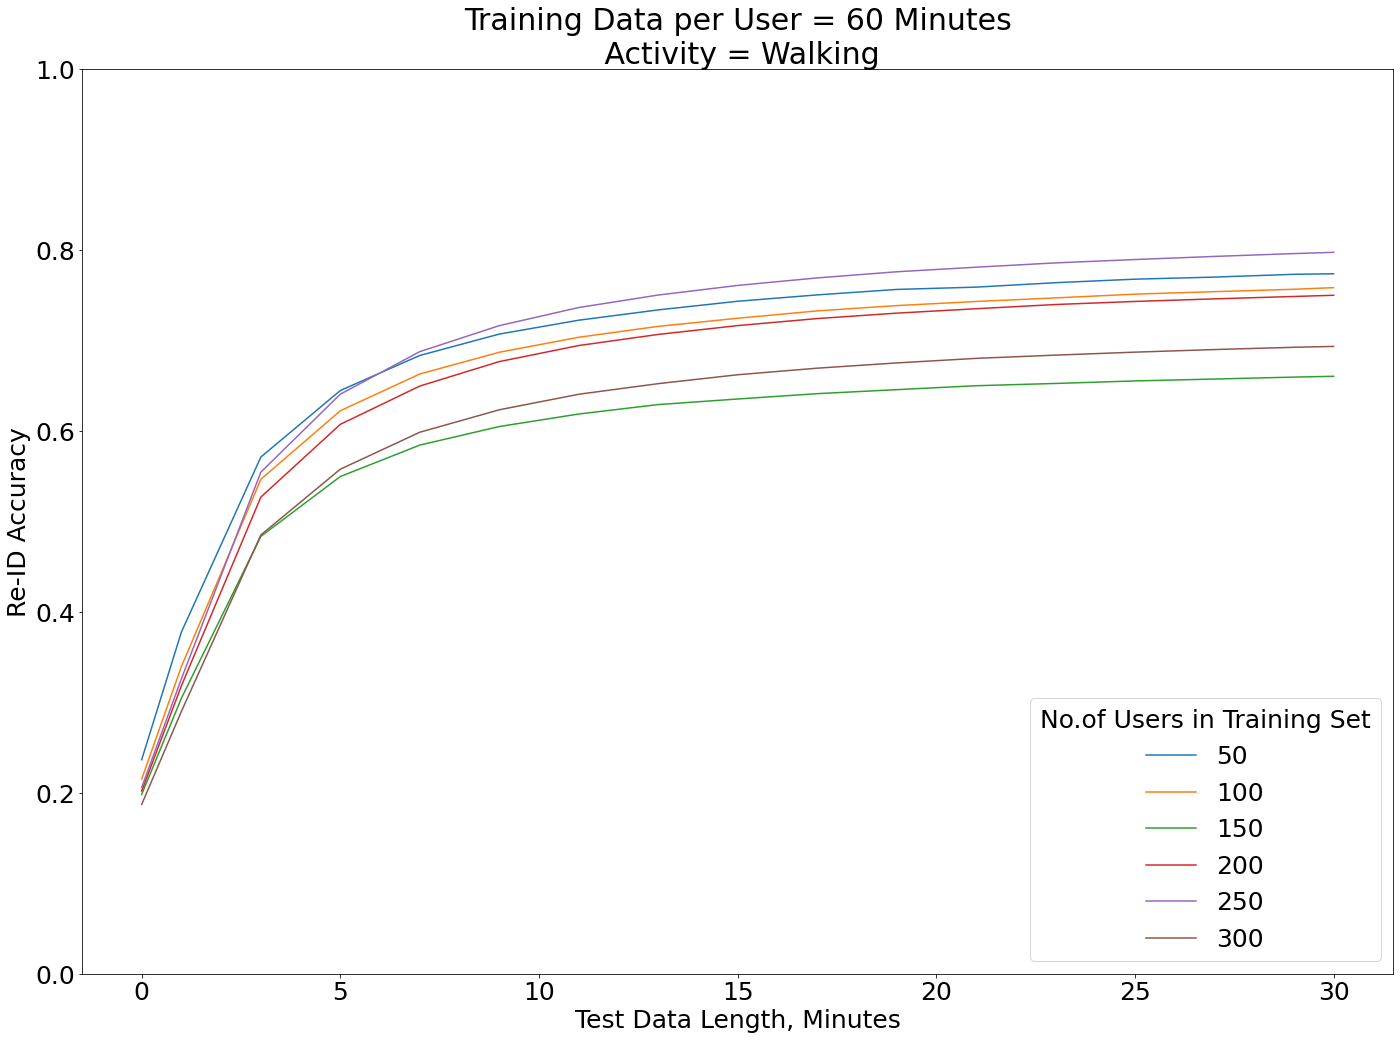

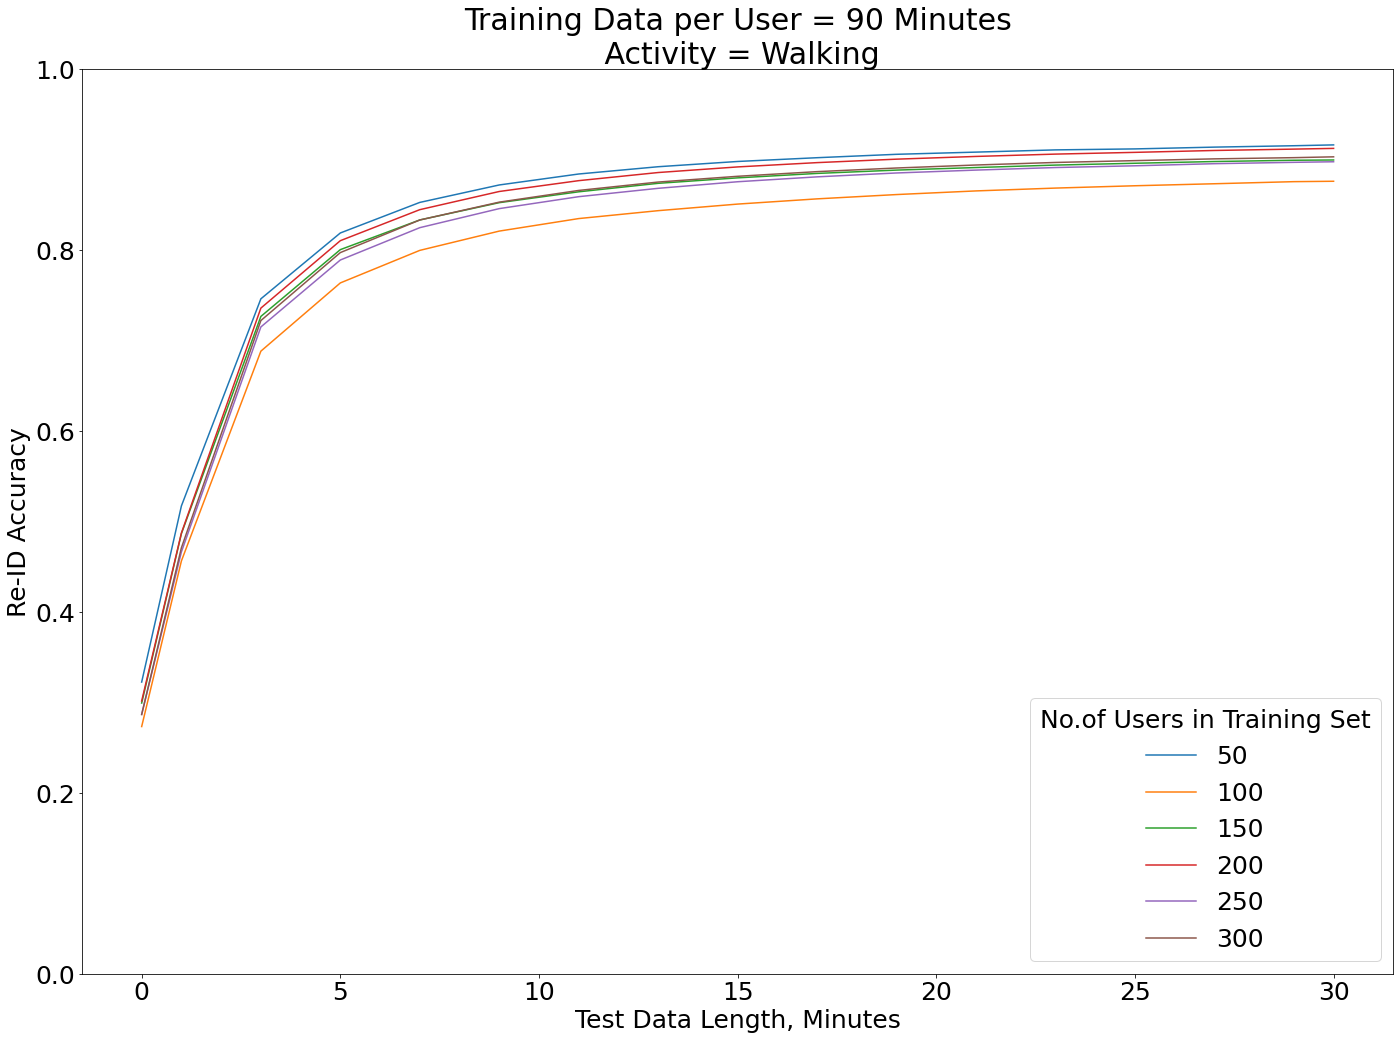

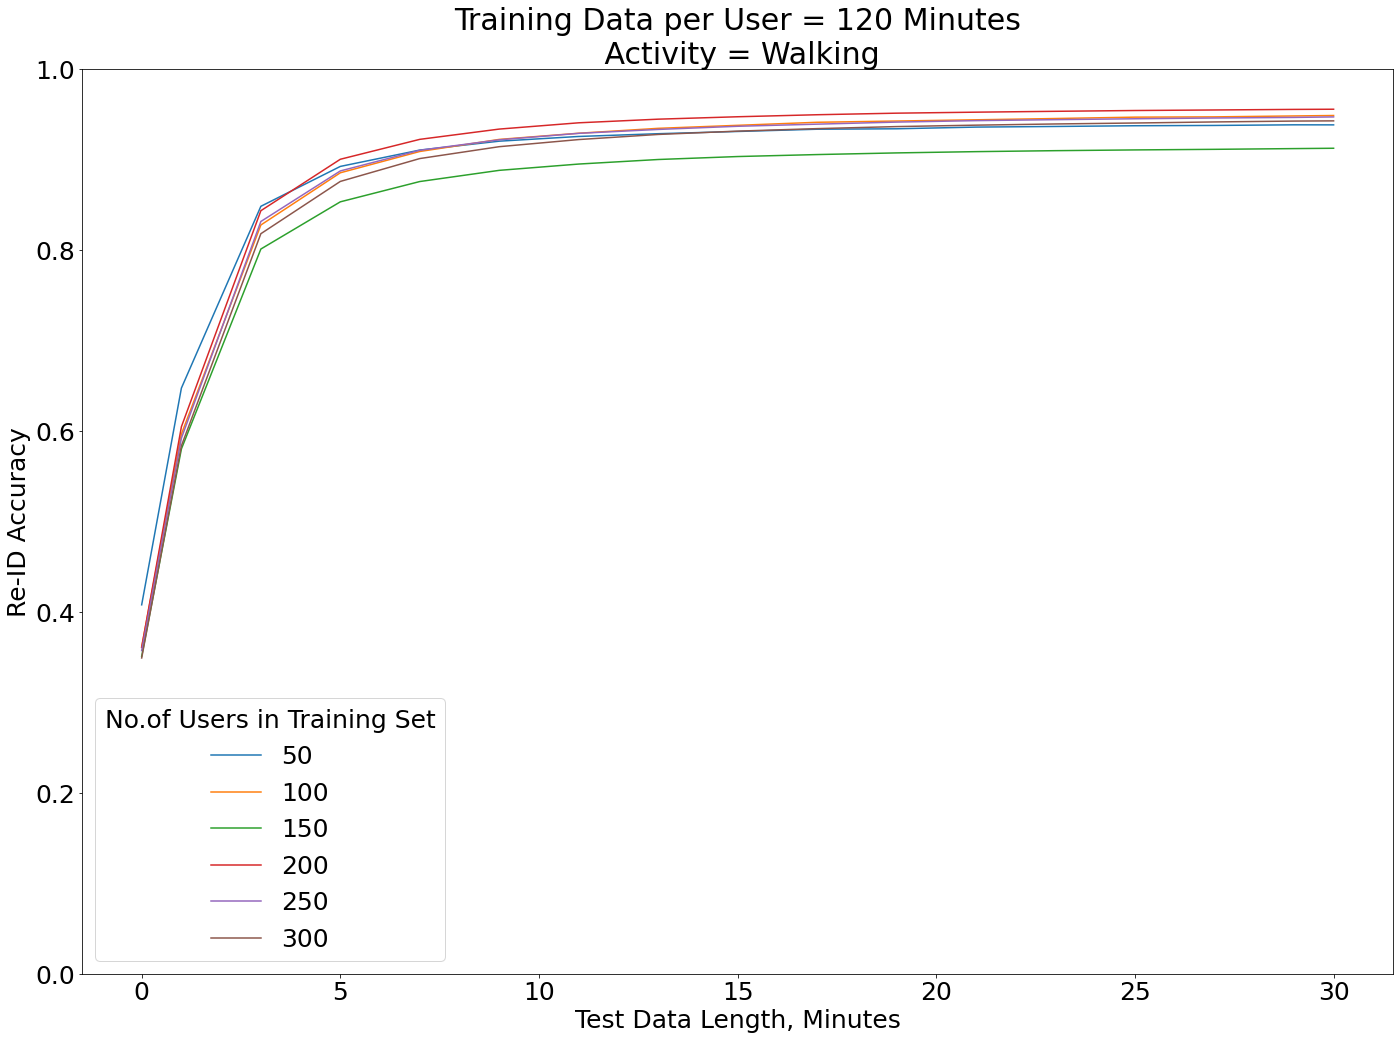

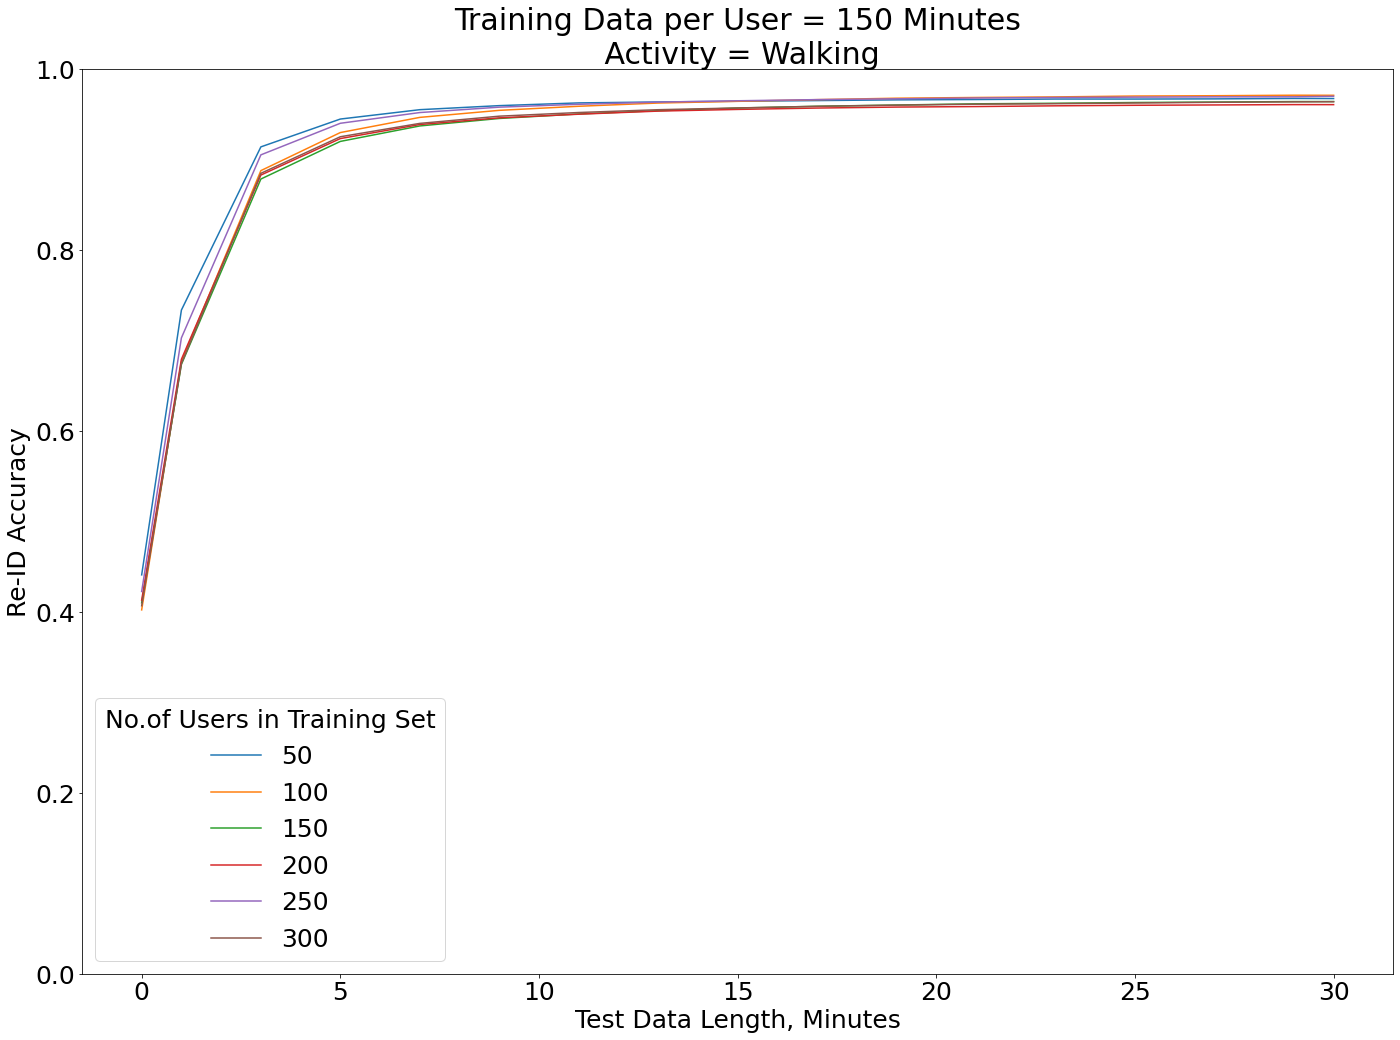

In [118]:
df_walking_mean['No.of Users in Training Set'] = df_walking_mean['train_user'].apply(lambda a:str(a))
for tr_length in df_walking_mean.train_lengths.unique():
    temp = df_walking_mean[(df_walking_mean.test_lengths<=60)&(df_walking_mean.train_lengths==tr_length)]
    plt.figure(figsize=(20,15))
    sns.lineplot(x='test_lengths',y='majority_score',hue='No.of Users in Training Set',data=temp)
    plt.ylim([0,1])
    plt.ylabel('Re-ID Accuracy')
    plt.xlabel('Test Data Length, Minutes')
    plt.title('Training Data per User = '+str(tr_length)+' Minutes\n Activity = Walking')
    plt.tight_layout()
    plt.savefig('./data/images/training_data_per_user_in_minutes_'+str(tr_length)+'.png')
    plt.show()

In [ ]:
import shutil
shutil.make_archive('./data/images/','zip','./data/images/')

In [ ]:
thresholds = np.arange(.61,1,.1)
def get_test_len(df):
    n_user = df['train_user'].values[0]
    tr_length = df['train_lengths'].values[0]
    df = df.sort_values('majority_score').reset_index(drop=True)
    matrix = df[['test_lengths','majority_score']].values.reshape(-1,2)
    matrix = matrix[matrix[:,0].argsort(),:]
    results = []
    for thres in thresholds:
        temp = matrix[matrix[:,1]>thres,:]
        if len(temp)==0:
            continue
        results.append([n_user,tr_length,temp[0][0],thres])
    return pd.DataFrame(results,columns=['train_user','train_lengths','test_lengths','threshold'])
df_walking_min_test = df_walking_mean.groupby(['train_user','train_lengths'],as_index=False).apply(get_test_len)

In [ ]:
import seaborn as sns

In [ ]:
for t in df_walking_min_test.threshold.unique():
    plt.figure(figsize=(20,10))
    sns.barplot(x='train_lengths',y='test_lengths',hue='train_user',data=df_walking_min_test[df_walking_min_test.threshold==t])
    plt.show()

In [55]:
import pickle
import numpy as np
import pandas as pd
X,y = pickle.load(open('./data/10/walking_all_data1.p','rb'))
y_participant = []
for i in range(len(X)):
    y_participant.extend([y[i]]*len(X[i])) 
y = np.array(y_participant)
X = np.concatenate(X)

In [56]:
X.shape,y.shape

((660863, 250, 3), (660863,))

In [58]:
from scipy.stats import skew,kurtosis
def get_features(a):
    return np.array(list(np.mean(a,axis=0))+list(np.std(a,axis=0))+list(np.percentile(a,80,axis=0))+
list(np.percentile(a,20,axis=0))+list(skew(a,axis=0))+list(kurtosis(a,axis=0)))

from joblib import Parallel,delayed

In [59]:
X_features = Parallel(n_jobs=20,verbose=2)(delayed(get_features)(a) for a in X)

[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   2 tasks      | elapsed:    4.4s
[Parallel(n_jobs=20)]: Done 214 tasks      | elapsed:    4.8s
[Parallel(n_jobs=20)]: Done 5888 tasks      | elapsed:    5.8s
[Parallel(n_jobs=20)]: Done 42112 tasks      | elapsed:   10.1s
[Parallel(n_jobs=20)]: Done 88832 tasks      | elapsed:   16.7s
[Parallel(n_jobs=20)]: Done 145792 tasks      | elapsed:   24.2s
[Parallel(n_jobs=20)]: Done 213248 tasks      | elapsed:   33.3s
[Parallel(n_jobs=20)]: Done 290944 tasks      | elapsed:   43.5s
[Parallel(n_jobs=20)]: Done 379136 tasks      | elapsed:   55.2s
[Parallel(n_jobs=20)]: Done 477568 tasks      | elapsed:  1.1min
[Parallel(n_jobs=20)]: Done 586496 tasks      | elapsed:  1.4min
[Parallel(n_jobs=20)]: Done 660863 out of 660863 | elapsed:  1.5min finished


In [60]:
X_features = np.array(X_features)

In [61]:
import pickle
pickle.dump([X_features,y],open('./data/features.p','wb'))

In [82]:
X_features,y = pickle.load(open('./data/features.p','rb'))

In [83]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [87]:
X_features = MinMaxScaler(feature_range=(1,100)).fit_transform(X_features)

In [88]:
X_features.shape

(660863, 18)

In [90]:
d = 18
.5*np.log(np.linalg.det(np.cov(X_features[:,:d].T))) + (d/2)*(1+np.log(2*np.pi))

36.728126980213474

In [50]:
.5*np.log((2*np.pi*np.e)**9)*np.linalg.det(np.cov(X_features[:,:9].T))

8.883116781883612e-06

In [95]:
unique_users = np.unique(y)
index_df = pd.DataFrame({'user':y,'index':np.arange(len(y))})
for i in range(len(unique_users)):
    temp_users = unique_users[:i+1]
    index = index_df[index_df.user.isin(temp_users)]['index'].values
    temp_feature = X_features[index]
    d = 2
    print(i+1,.5*np.log(np.linalg.det(np.cov(temp_feature[:,:d].T))) + (d/2)*(1+np.log(2*np.pi)))

In [96]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model('./models/10/')